* Source: https://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py
* Source: https://github.com/scikit-learn/scikit-learn/blob/main/sklearn/feature_selection/_rfe.py

In [27]:
import numpy as np
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from timerun import time_code, time_func

class SVM_RFE():
    def __init__(self, n_features_to_select, percentage=0.3):
        self.n_features_to_select = n_features_to_select
        self.percentage = percentage

    @time_func
    def fit(self, X0, y):
        self.scores_ = {}
        
        n_features_to_select = self.n_features_to_select
        n_features = X0.shape[1]
        if n_features_to_select is None:
            n_features_to_select = n_features
            
        support_ = np.ones(n_features, dtype=bool)
        ranking_ = np.ones(n_features, dtype=int)
    
        # np.sum(support_) is the number of selected features.
        # It starts at n_features and decreases every iteration.
        while np.sum(support_) > n_features_to_select:
            
            # Remaining features, represented with a list of indices.
            features = np.arange(n_features)[support_]
            X = X0[:, features]

            # Declare and train the SVM
            with time_code('SVM #' + str(np.sum(support_))):
                estimator = LinearSVC(C=1000000000, max_iter=2000, dual=False)
                estimator.fit(X, y)

            # Get importance and rank them
            importances = estimator.coef_ ** 2
            ranks = np.argsort(importances)

            # Flatten ranks, required for Multi-Class Classification.
            ranks = np.ravel(ranks)

            # Calculate t (step)
            min_threshold = np.sum(support_) - n_features_to_select
            threshold = max(int(self.percentage * min_threshold), 1)

            # Eliminate the worse feature
            for i in range(0, threshold):
                selected_feature = features[ranks[i]]
                support_[selected_feature] = False
                ranking_[np.logical_not(support_)] += 1

            # Record score
            self.scores_[np.sum(support_)] = estimator.score(X,y)


        # Set final attributes
        self.n_features_ = support_.sum()
        self.support_ = support_
        self.ranking_ = ranking_

        return self


# Feature Selection

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load the madelon training dataset
train_data = pd.read_table("MADELON/madelon_train.data", sep=' ', header=None, usecols=range(0,500))
train_labels = pd.read_table("MADELON/madelon_train.labels", sep=' ', header=None)
X_train, X_test = np.split(train_data.to_numpy(), [1200])
y_train, y_test = np.split(np.ravel(train_labels.to_numpy()), [1200])


In [29]:
# Create the RFE object and rank each pixel
rfe = SVM_RFE(n_features_to_select=150, percentage=0.1)
rfe.fit(X_train, y_train)

SVM #500 - 00:00:01.421734800
SVM #465 - 00:00:00.918853600
SVM #434 - 00:00:00.957783900
SVM #406 - 00:00:00.938276800
SVM #381 - 00:00:00.852013500
SVM #358 - 00:00:00.618652700
SVM #338 - 00:00:00.575352700
SVM #320 - 00:00:00.575814300
SVM #303 - 00:00:00.477112000
SVM #288 - 00:00:00.522014700
SVM #275 - 00:00:00.400623800
SVM #263 - 00:00:00.399651900
SVM #252 - 00:00:00.393941400
SVM #242 - 00:00:00.374803100
SVM #233 - 00:00:00.332477500
SVM #225 - 00:00:00.320590400
SVM #218 - 00:00:00.357759300
SVM #212 - 00:00:00.310324800
SVM #206 - 00:00:00.255494500
SVM #201 - 00:00:00.319274800
SVM #196 - 00:00:00.299248500
SVM #192 - 00:00:00.245701300
SVM #188 - 00:00:00.262964500
SVM #185 - 00:00:00.187440700
SVM #182 - 00:00:00.202721900
SVM #179 - 00:00:00.187462900
SVM #177 - 00:00:00.213063800
SVM #175 - 00:00:00.196666100
SVM #173 - 00:00:00.193023100
SVM #171 - 00:00:00.185959700
SVM #169 - 00:00:00.253981600
SVM #168 - 00:00:00.199154900
SVM #167 - 00:00:00.246673500
SVM #166 -

# Testing

In [30]:
rfe.ranking_
np.argsort(rfe.ranking_)

array([292, 227, 433, 426, 425, 226, 115, 424, 228, 423, 348, 120, 121,
       122, 420, 353, 219, 422, 434, 231, 232,  85,  86, 239, 237, 384,
        90, 451, 450, 449,  96, 233, 447, 446, 445, 101, 102, 103, 126,
        83, 217, 130, 407, 198, 378, 162, 380, 189, 166, 200, 167, 382,
       395, 394, 185, 383, 182, 388, 168, 154, 153, 152, 214, 212, 133,
       361, 207, 137, 364, 139, 205, 142, 414, 204, 413, 293, 410, 148,
       150, 357, 453, 236, 456,  28, 310,  30, 275, 317,  34, 481,  26,
       265, 454,  39,  40,  41,  42, 321,  44, 480, 323, 309,  23, 296,
       497, 298,   5, 496,   7,   9, 490,  12, 301, 493, 492, 491, 306,
       278,  22, 282, 258,  38,  48, 345, 338,  76,  74,  73, 461, 466,
        69,  68, 476, 247, 248,  63, 332,  61, 387, 474, 328,  53, 252,
       325, 471,  49, 473, 331,  56,  55, 416, 183, 403,  60, 159, 314,
        27,  19, 402, 415, 300, 367, 465, 342, 112, 285,  92, 452, 286,
         4,  21, 235, 409, 399, 346, 211,  67, 459,  65, 412, 10

In [31]:
test_scores = {}
test_selection = np.argsort(rfe.ranking_)

rfe.ranking_[test_selection[1]] == 2

False

In [34]:
test_scores = {}
test_selection = np.argsort(rfe.ranking_)

for i in range(150, 400, 8):
    features = test_selection[:i]
 
    with time_code('TEST SVM #' + str(i)):
        svm = LinearSVC(C=1000, max_iter=2000, dual=False)
        svm.fit(X_train[:,features], y_train)

    test_scores[i] = svm.score(X_test[:,features], y_test)

TEST SVM #150 - 00:00:00.187557600
TEST SVM #158 - 00:00:00.222662800
TEST SVM #166 - 00:00:00.169414500
TEST SVM #174 - 00:00:00.178048900
TEST SVM #182 - 00:00:00.225356400
TEST SVM #190 - 00:00:00.222806000
TEST SVM #198 - 00:00:00.275795500
TEST SVM #206 - 00:00:00.299540400
TEST SVM #214 - 00:00:00.303739100
TEST SVM #222 - 00:00:00.314165800
TEST SVM #230 - 00:00:00.409758600
TEST SVM #238 - 00:00:00.369713400
TEST SVM #246 - 00:00:00.412767900
TEST SVM #254 - 00:00:00.344412800
TEST SVM #262 - 00:00:00.486592300
TEST SVM #270 - 00:00:00.425693000
TEST SVM #278 - 00:00:00.572700300
TEST SVM #286 - 00:00:00.549226000
TEST SVM #294 - 00:00:00.572625200
TEST SVM #302 - 00:00:00.536487800
TEST SVM #310 - 00:00:00.616907500
TEST SVM #318 - 00:00:00.616771800
TEST SVM #326 - 00:00:00.694367000
TEST SVM #334 - 00:00:00.659453500
TEST SVM #342 - 00:00:00.580450200
TEST SVM #350 - 00:00:00.683592200
TEST SVM #358 - 00:00:00.706128700
TEST SVM #366 - 00:00:00.880744100
TEST SVM #374 - 00:0

# Analysis

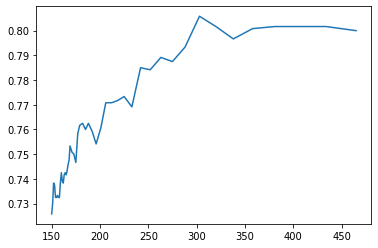

In [35]:
plt.plot(rfe.scores_.keys(), rfe.scores_.values())

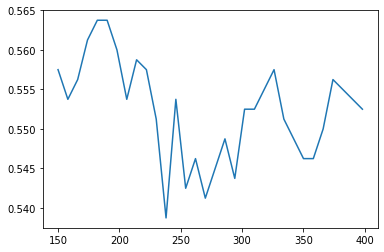

In [36]:
plt.plot(test_scores.keys(), test_scores.values())

The machine doesn't work very well, with a maximum score arround 0.57 on the test set. Clearly, there is overfitting, and altough using less features improves a bit the score, it is a marginal amount.